In [1]:
import lib.matnpy.matnpyio as io

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import collections
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix

import os

In [3]:
sess_no = '141014'
raw_path = '/media/rudy/disk2/lucy/'



In [4]:
tinfo_path = raw_path + sess_no + '/session01/trial_info.mat' 
rinfo_path = raw_path + sess_no + '/session01/recording_info.mat' 

In [5]:
tinfo_path


'/media/rudy/disk2/lucy/141014/session01/trial_info.mat'

In [17]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          ylabel='sample_image',
                          xlabel='response image',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)
    
    #plt.subplot(122)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    

In [6]:
resp = io.get_responses(tinfo_path)


### Number of trial
print('Number of trial :', len(resp))

### Number of available trial (non_missing data)
print('Number of available trial (non missing data) :', np.sum(resp == resp) )

### Number of succès
print('Number of Succès :', np.sum(resp == 1) )

### accuracy rate of the monkey
print('monkey acc : ', round( 100*np.sum(resp == 1)/np.sum(resp==resp), 1 ), ' %')

Number of trial : 742
Number of available trial (non missing data) : 466
Number of Succès : 334
monkey acc :  71.7  %


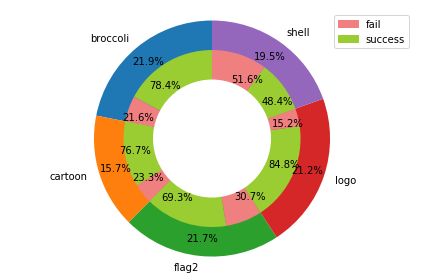

In [7]:
resp = io.get_responses(tinfo_path)
stim = io.get_samples(tinfo_path)

#keep only non missing data

resp = resp[resp==resp].flatten()
stim = stim[stim==stim].flatten()

# get label = image name
labels = io.get_image_names(rinfo_path)

# c[i] = Number of element of the class i  i.e c[class] = N_i
c = collections.Counter(stim)
classes = len(c)

# c2[i] = Number of succès of the class i 
c2 = collections.Counter(stim[resp==1])
succès_per_class = classes * [0]
for i in range(classes):
    succès_per_class[i] = c2[i]/c[i]

# N_per_class[classes] = Number of class i
N_per_class = classes * [0]
for i in range(classes):
    N_per_class[i] = c[i]
    

# N_per_class_succes_fail[2*class] = Number of succès of class i
# N_per_class_succes_fail[2*class+1] = Number of fail of class i
N_per_class_succes_fail = []
for i in range(5):
    N_per_class_succes_fail.append(c2[i])
    N_per_class_succes_fail.append(c[i]- c2[i])
    
labels_gender = []
for i in range(5):
    labels_gender.append(str(round(100*succès_per_class[i],1))+'%')
    labels_gender.append(str(round(100*(1-succès_per_class[i]),1))+'%')
    
colors_gender = classes*['yellowgreen', 'lightcoral'] # [color of succès, color of fail]

# Plot
plt.pie(N_per_class, labels=labels, autopct='%1.1f%%', pctdistance=0.85,startangle=90,frame=True)
plt.pie(N_per_class_succes_fail,labels=labels_gender ,labeldistance=0.7, colors=colors_gender,radius=0.75,startangle=90)
#plt.pie(N_per_class_succes_fail,autopct='%1.1f%%', colors=colors_gender,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
red_patch = mpatches.Patch(color='lightcoral', label='fail')
green_patch = mpatches.Patch(color='yellowgreen', label='success')
plt.legend(handles=[red_patch, green_patch])
#plt.legend(('red', 'b', 'g'), ('label1', 'label2', 'label3'))
plt.show()









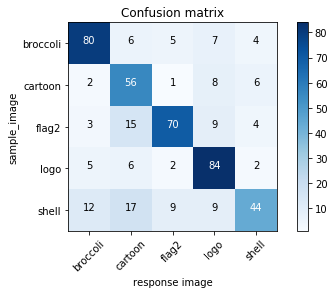

In [23]:
resp = io.get_responses(tinfo_path)
stim = io.get_samples(tinfo_path)
non_match = io.get_nonmatch(tinfo_path)

labels = io.get_image_names(rinfo_path)

# keep only non missing data

resp = resp[resp==resp].flatten()
stim = stim[stim==stim].flatten()
non_match = non_match[non_match==non_match].flatten()

# get confusion matrix
y_true = stim
y_pred = stim * resp + non_match * (1 - resp)
cnf = confusion_matrix(y_true, y_pred)

# plot it 
#plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf, labels,
                          normalize=False,
                          title='Confusion matrix',
                          ylabel='sample_image',
                          xlabel='response image')





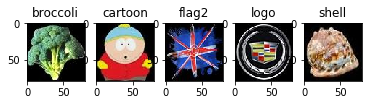

In [25]:
images = io.get_image(rinfo_path)
images_names = io.get_image_names(rinfo_path)

for i in range(0,5):
    plt.subplot(151+i)
    plt.imshow(images[i])
    plt.title(images_names[i])    

plt.show()

In [ ]:
### for all session

In [29]:
session = os.listdir(raw_path)
session.remove('unique_recordings.mat')
session = sorted(session)
print(session)

['141014', '141015', '141016', '141017', '141023', '141024', '141029', '141103', '141112', '141113', '141125', '141126', '141127', '141128', '141202', '141203', '141205', '141208', '141209', '141211', '141212', '141215', '141216', '141217', '141218', '150114', '150126', '150128', '150129', '150205', '150210', '150211', '150212', '150213', '150217', '150219', '150223', '150224', '150226', '150227', '150302', '150303', '150304', '150305', '150403', '150407', '150408', '150413', '150414', '150415', '150416', '150427', '150428', '150429', '150430', '150504', '150511', '150512', '150527', '150528', '150529', '150608']


######################################################################
###################### SESSION N° 141014 #############################
######################################################################

Number of trial : 742
Number of available trial (non missing data) : 466
Number of Succès : 334
monkey acc :  71.7  %


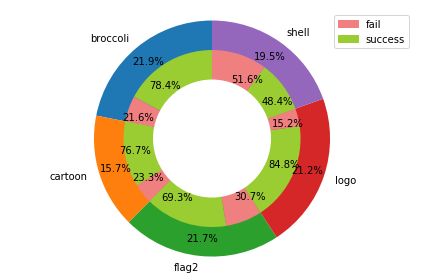

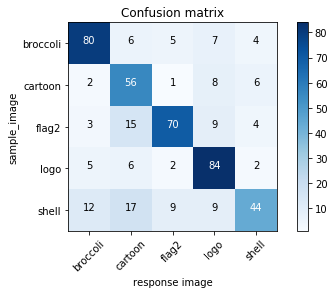

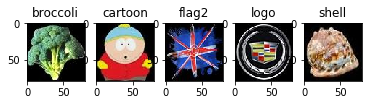

######################################################################
###################### SESSION N° 141015 #############################
######################################################################

Number of trial : 760
Number of available trial (non missing data) : 451
Number of Succès : 351
monkey acc :  77.8  %


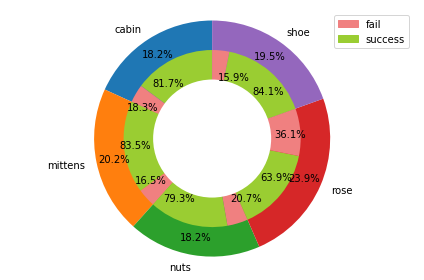

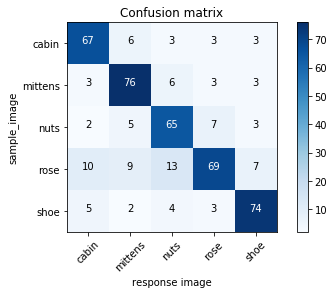

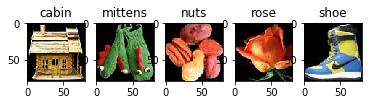

######################################################################
###################### SESSION N° 141016 #############################
######################################################################

Number of trial : 784
Number of available trial (non missing data) : 475
Number of Succès : 346
monkey acc :  72.8  %


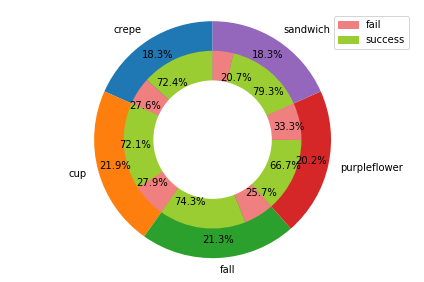

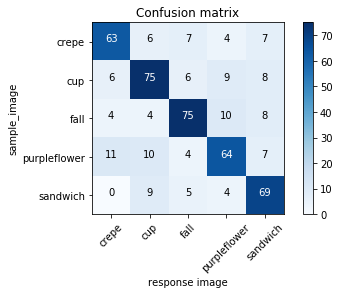

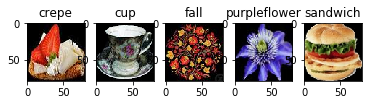

######################################################################
###################### SESSION N° 141017 #############################
######################################################################

Number of trial : 777
Number of available trial (non missing data) : 431
Number of Succès : 332
monkey acc :  77.0  %


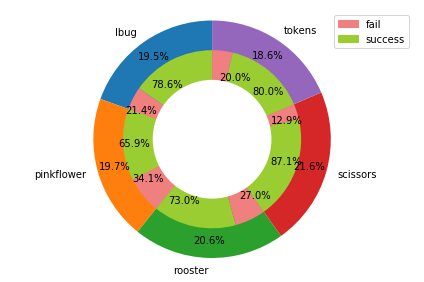

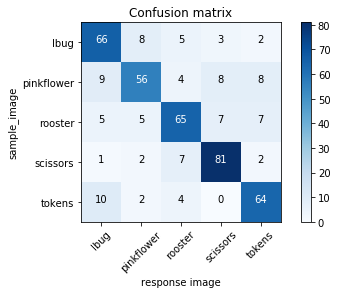

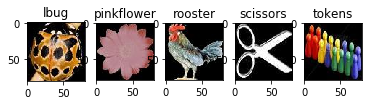

######################################################################
###################### SESSION N° 141023 #############################
######################################################################

Number of trial : 1022
Number of available trial (non missing data) : 681
Number of Succès : 532
monkey acc :  78.1  %


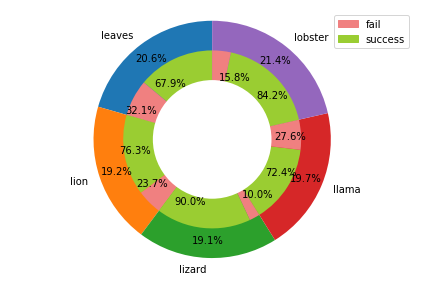

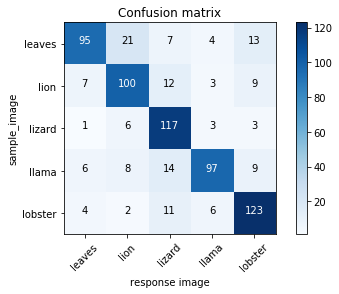

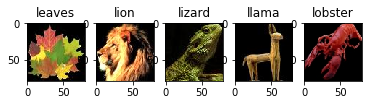

######################################################################
###################### SESSION N° 141024 #############################
######################################################################

Number of trial : 1031
Number of available trial (non missing data) : 701
Number of Succès : 582
monkey acc :  83.0  %


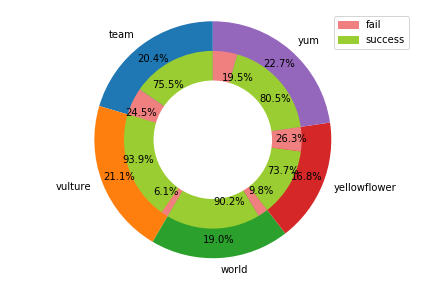

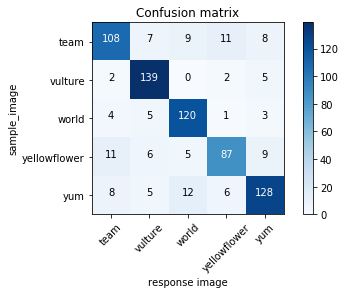

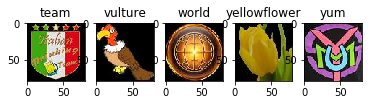

######################################################################
###################### SESSION N° 141029 #############################
######################################################################

Number of trial : 696
Number of available trial (non missing data) : 500
Number of Succès : 400
monkey acc :  80.0  %


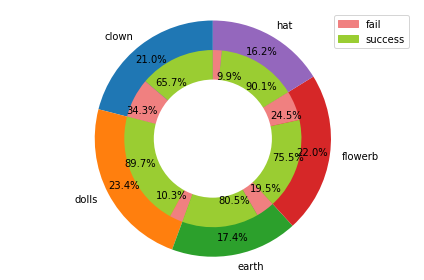

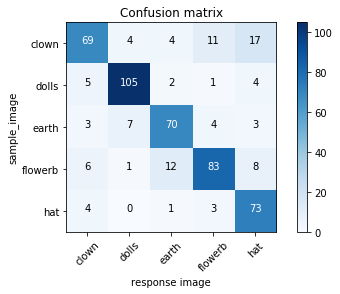

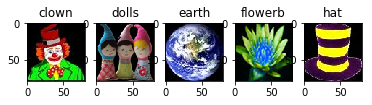

######################################################################
###################### SESSION N° 141103 #############################
######################################################################

Number of trial : 717
Number of available trial (non missing data) : 451
Number of Succès : 330
monkey acc :  73.2  %


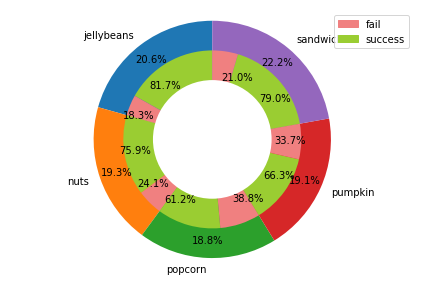

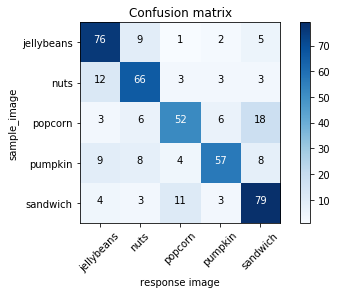

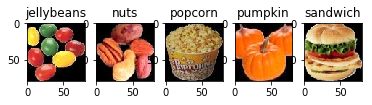

######################################################################
###################### SESSION N° 141112 #############################
######################################################################

Number of trial : 794
Number of available trial (non missing data) : 521
Number of Succès : 476
monkey acc :  91.4  %


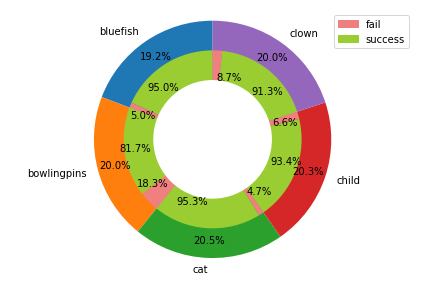

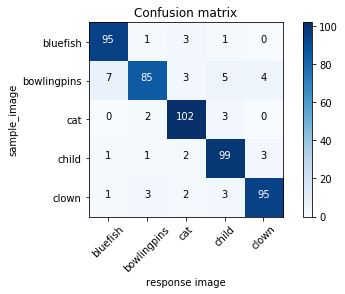

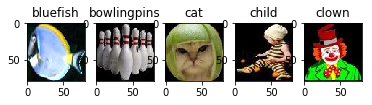

######################################################################
###################### SESSION N° 141113 #############################
######################################################################

Number of trial : 1170
Number of available trial (non missing data) : 639
Number of Succès : 584
monkey acc :  91.4  %


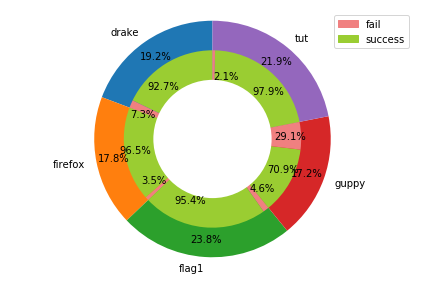

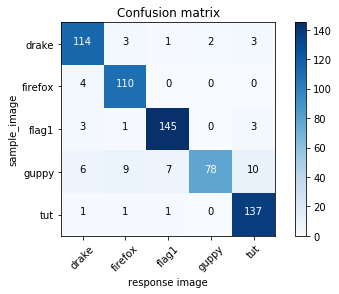

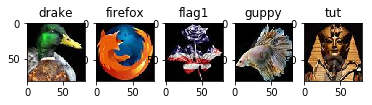

######################################################################
###################### SESSION N° 141125 #############################
######################################################################

Number of trial : 626
Number of available trial (non missing data) : 377
Number of Succès : 334
monkey acc :  88.6  %


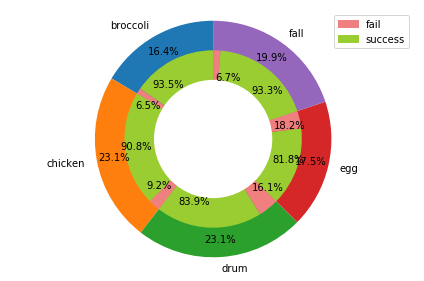

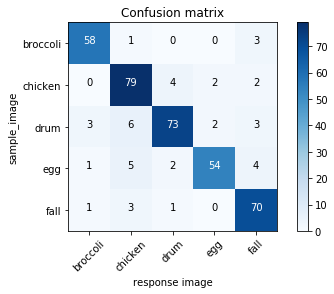

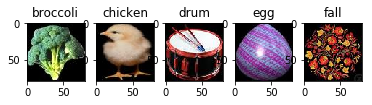

######################################################################
###################### SESSION N° 141126 #############################
######################################################################

Number of trial : 882
Number of available trial (non missing data) : 498
Number of Succès : 436
monkey acc :  87.6  %


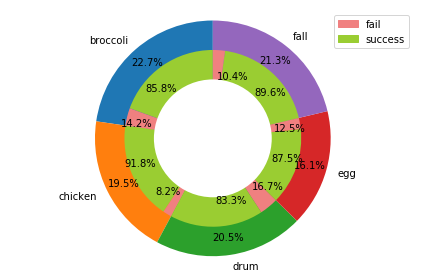

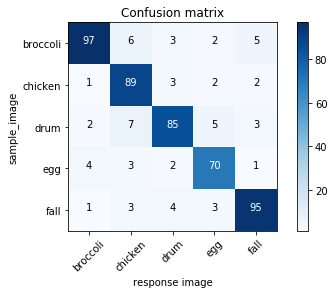

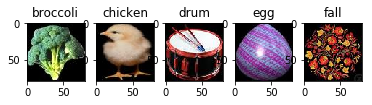

######################################################################
###################### SESSION N° 141127 #############################
######################################################################

Number of trial : 914
Number of available trial (non missing data) : 531
Number of Succès : 496
monkey acc :  93.4  %


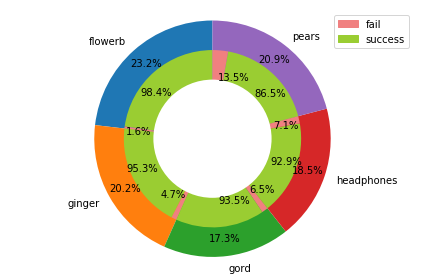

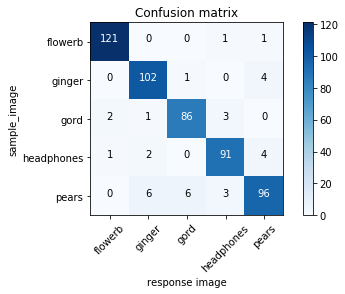

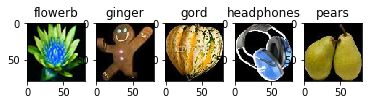

######################################################################
###################### SESSION N° 141128 #############################
######################################################################

Number of trial : 884
Number of available trial (non missing data) : 528
Number of Succès : 487
monkey acc :  92.2  %


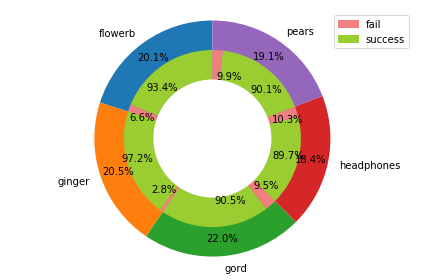

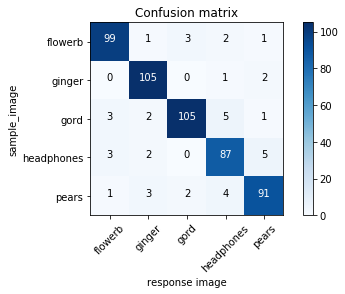

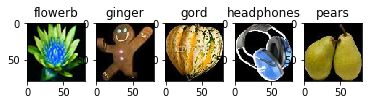

######################################################################
###################### SESSION N° 141202 #############################
######################################################################

Number of trial : 926
Number of available trial (non missing data) : 520
Number of Succès : 472
monkey acc :  90.8  %


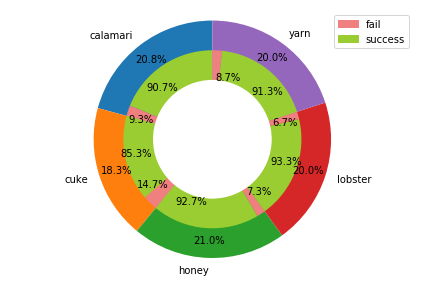

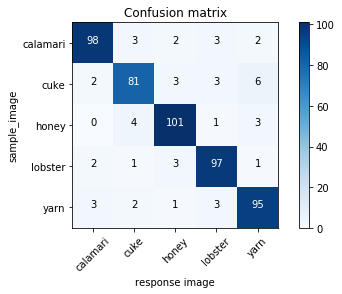

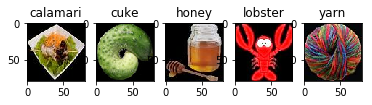

######################################################################
###################### SESSION N° 141203 #############################
######################################################################

Number of trial : 1023
Number of available trial (non missing data) : 531
Number of Succès : 466
monkey acc :  87.8  %


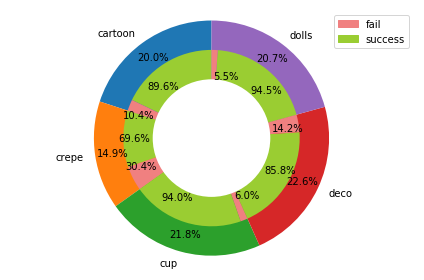

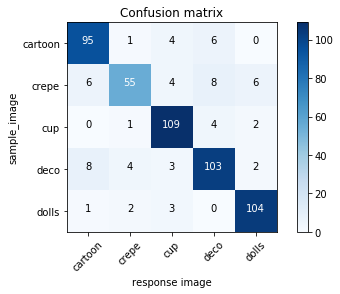

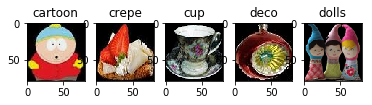

######################################################################
###################### SESSION N° 141205 #############################
######################################################################

Number of trial : 1024
Number of available trial (non missing data) : 602
Number of Succès : 540
monkey acc :  89.7  %


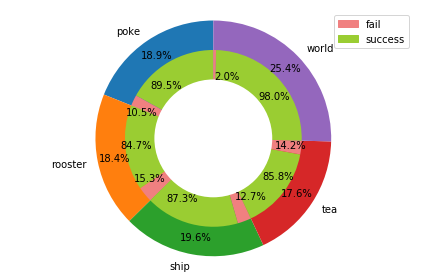

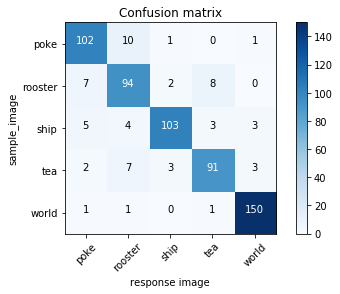

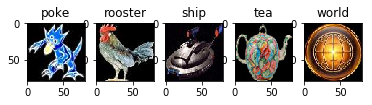

######################################################################
###################### SESSION N° 141208 #############################
######################################################################

Number of trial : 888
Number of available trial (non missing data) : 509
Number of Succès : 463
monkey acc :  91.0  %


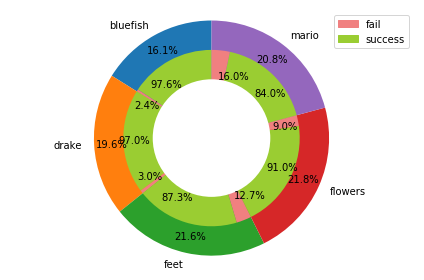

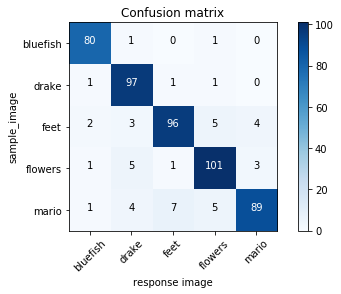

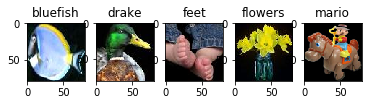

######################################################################
###################### SESSION N° 141209 #############################
######################################################################

Number of trial : 1070
Number of available trial (non missing data) : 589
Number of Succès : 558
monkey acc :  94.7  %


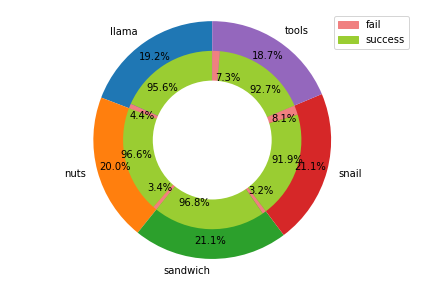

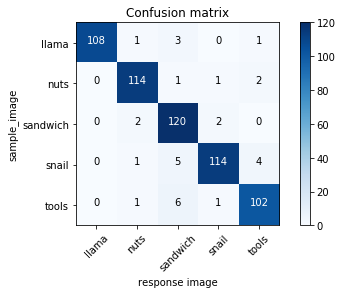

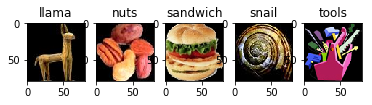

######################################################################
###################### SESSION N° 141211 #############################
######################################################################

Number of trial : 1208
Number of available trial (non missing data) : 692
Number of Succès : 650
monkey acc :  93.9  %


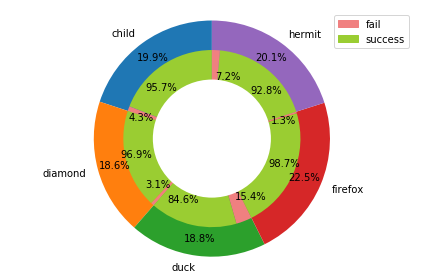

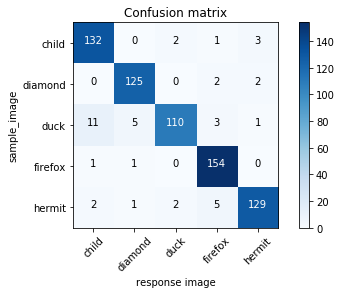

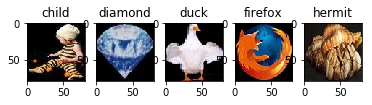

######################################################################
###################### SESSION N° 141212 #############################
######################################################################

Number of trial : 955
Number of available trial (non missing data) : 491
Number of Succès : 456
monkey acc :  92.9  %


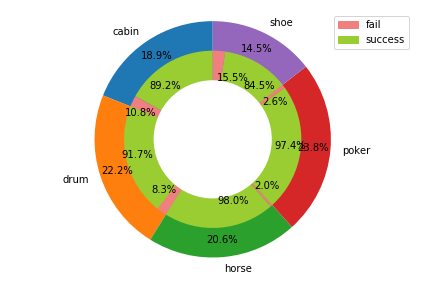

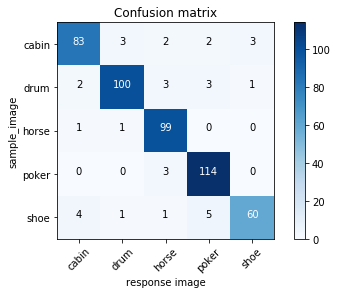

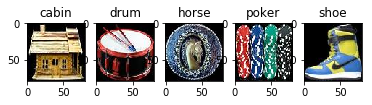

######################################################################
###################### SESSION N° 141215 #############################
######################################################################

Number of trial : 962
Number of available trial (non missing data) : 558
Number of Succès : 525
monkey acc :  94.1  %


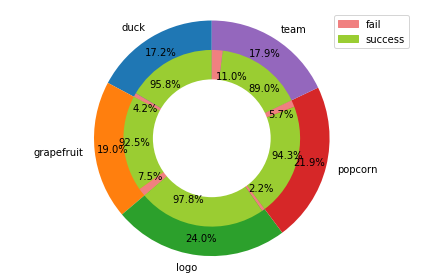

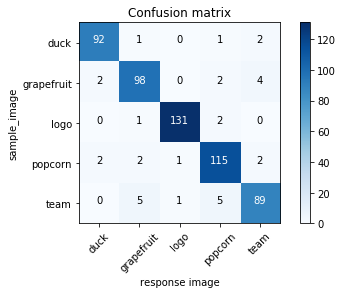

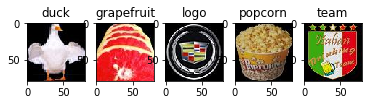

######################################################################
###################### SESSION N° 141216 #############################
######################################################################

Number of trial : 1118
Number of available trial (non missing data) : 619
Number of Succès : 576
monkey acc :  93.1  %


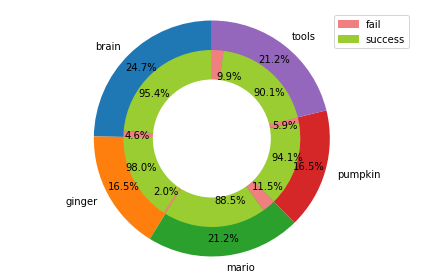

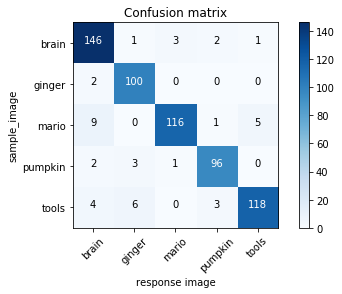

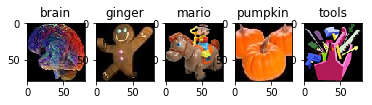

######################################################################
###################### SESSION N° 141217 #############################
######################################################################

Number of trial : 1447
Number of available trial (non missing data) : 725
Number of Succès : 656
monkey acc :  90.5  %


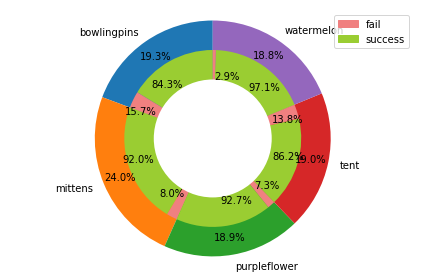

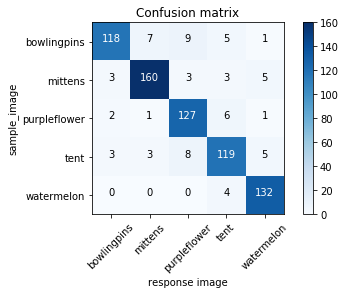

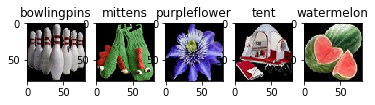

######################################################################
###################### SESSION N° 141218 #############################
######################################################################

Number of trial : 1125
Number of available trial (non missing data) : 588
Number of Succès : 529
monkey acc :  90.0  %


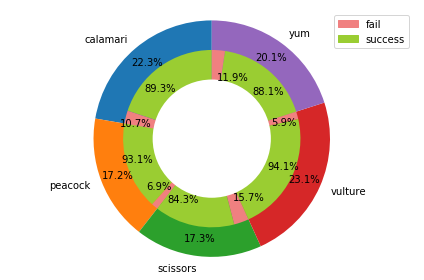

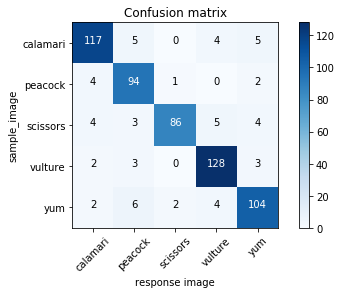

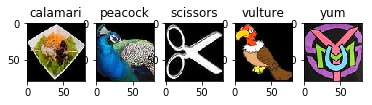

######################################################################
###################### SESSION N° 150114 #############################
######################################################################

Number of trial : 1092
Number of available trial (non missing data) : 628
Number of Succès : 595
monkey acc :  94.7  %


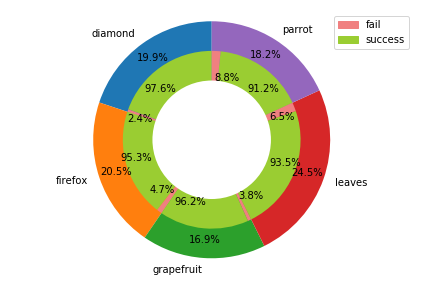

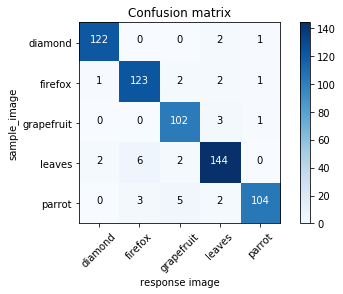

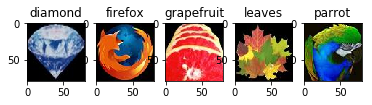

######################################################################
###################### SESSION N° 150126 #############################
######################################################################

Number of trial : 877
Number of available trial (non missing data) : 486
Number of Succès : 439
monkey acc :  90.3  %


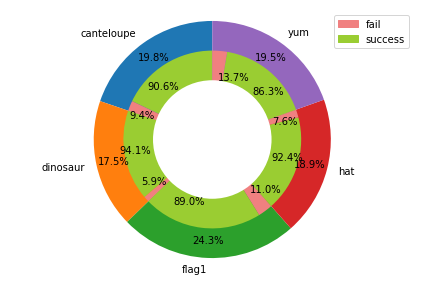

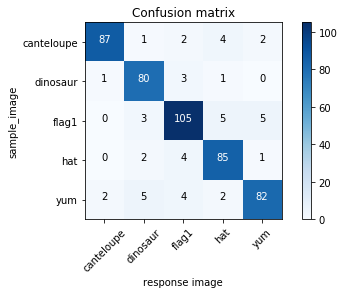

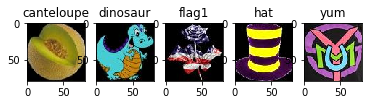

######################################################################
###################### SESSION N° 150128 #############################
######################################################################

Number of trial : 1006
Number of available trial (non missing data) : 556
Number of Succès : 540
monkey acc :  97.1  %


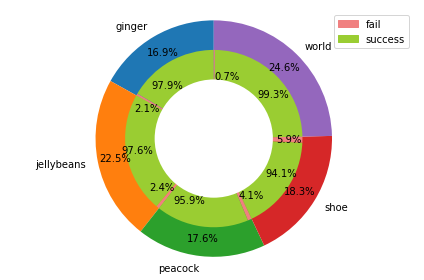

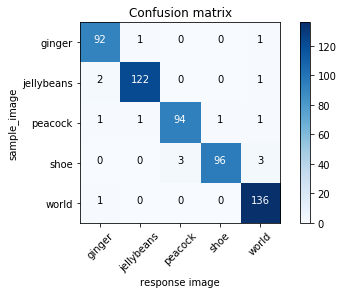

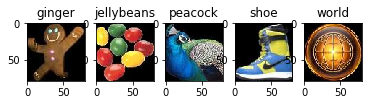

######################################################################
###################### SESSION N° 150129 #############################
######################################################################

Number of trial : 1184
Number of available trial (non missing data) : 648
Number of Succès : 594
monkey acc :  91.7  %


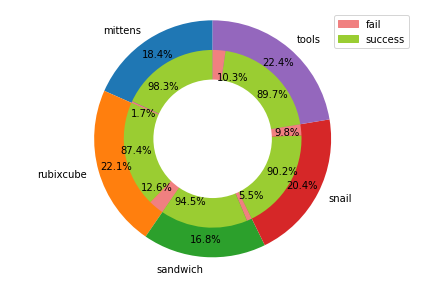

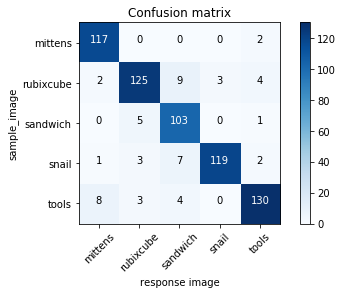

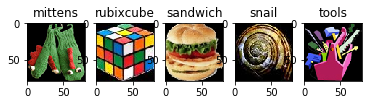

######################################################################
###################### SESSION N° 150205 #############################
######################################################################

Number of trial : 799
Number of available trial (non missing data) : 413
Number of Succès : 355
monkey acc :  86.0  %


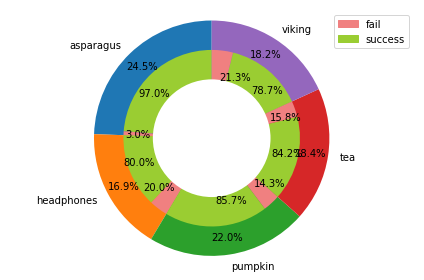

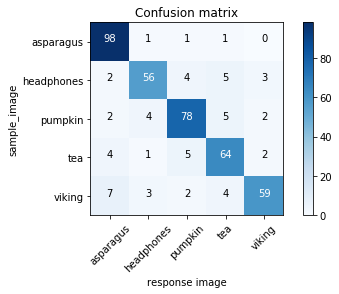

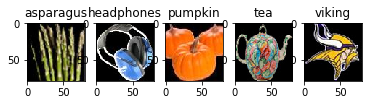

######################################################################
###################### SESSION N° 150210 #############################
######################################################################

Number of trial : 1015
Number of available trial (non missing data) : 561
Number of Succès : 531
monkey acc :  94.7  %


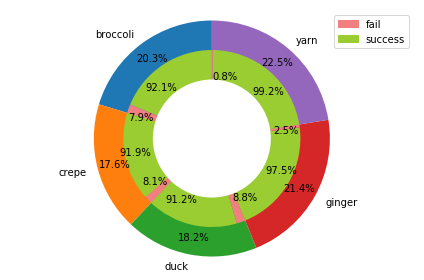

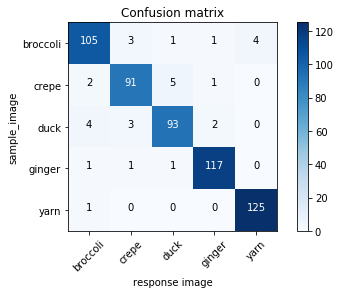

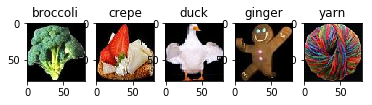

######################################################################
###################### SESSION N° 150211 #############################
######################################################################

Number of trial : 1022
Number of available trial (non missing data) : 513
Number of Succès : 493
monkey acc :  96.1  %


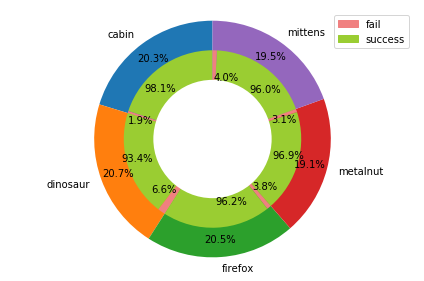

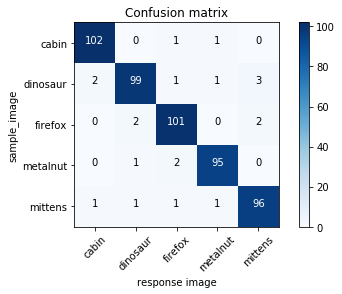

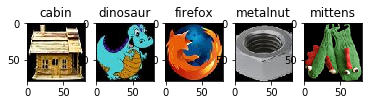

######################################################################
###################### SESSION N° 150212 #############################
######################################################################

Number of trial : 1012
Number of available trial (non missing data) : 522
Number of Succès : 474
monkey acc :  90.8  %


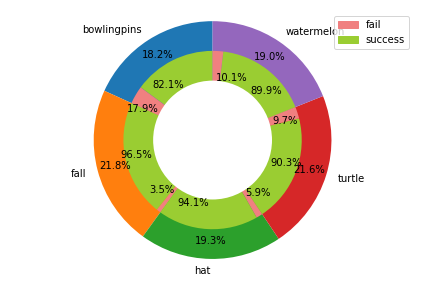

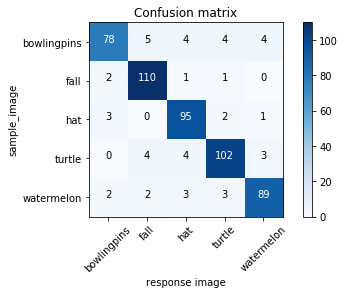

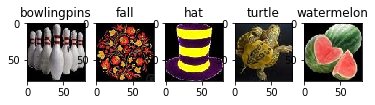

######################################################################
###################### SESSION N° 150213 #############################
######################################################################

Number of trial : 821
Number of available trial (non missing data) : 463
Number of Succès : 446
monkey acc :  96.3  %


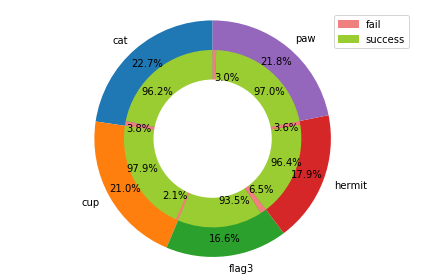

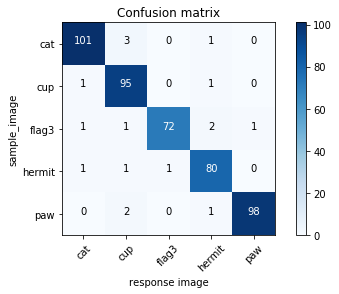

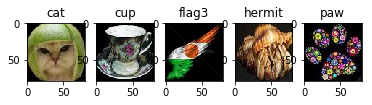

######################################################################
###################### SESSION N° 150217 #############################
######################################################################

Number of trial : 732
Number of available trial (non missing data) : 405
Number of Succès : 364
monkey acc :  89.9  %


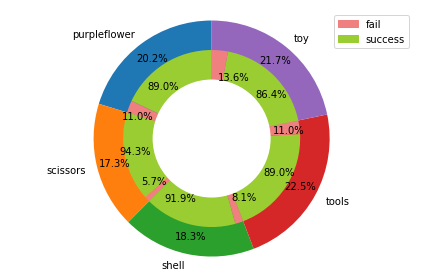

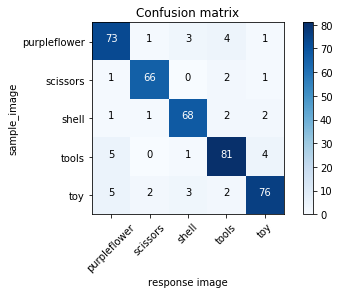

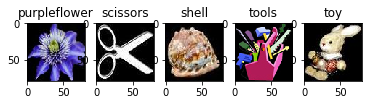

######################################################################
###################### SESSION N° 150219 #############################
######################################################################

Number of trial : 1070
Number of available trial (non missing data) : 506
Number of Succès : 466
monkey acc :  92.1  %


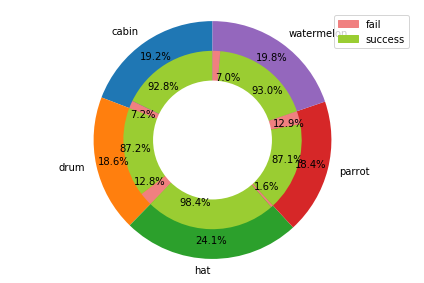

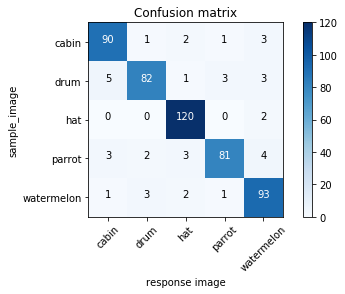

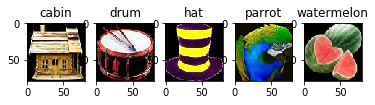

######################################################################
###################### SESSION N° 150223 #############################
######################################################################

Number of trial : 1176
Number of available trial (non missing data) : 642
Number of Succès : 551
monkey acc :  85.8  %


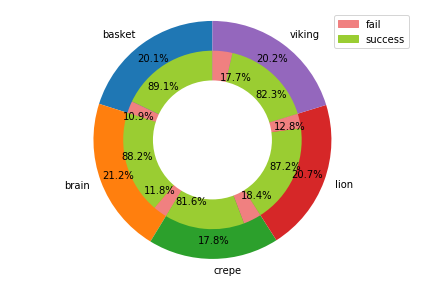

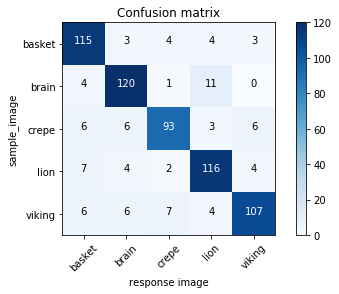

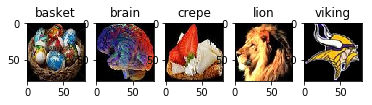

######################################################################
###################### SESSION N° 150224 #############################
######################################################################

Number of trial : 1011
Number of available trial (non missing data) : 566
Number of Succès : 529
monkey acc :  93.5  %


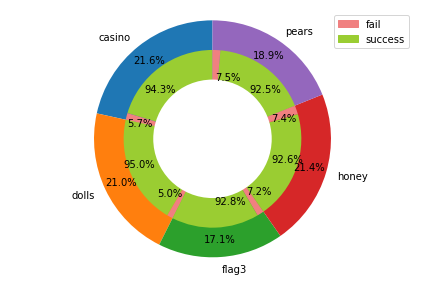

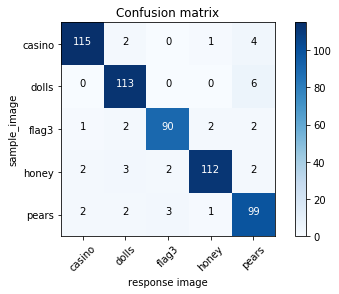

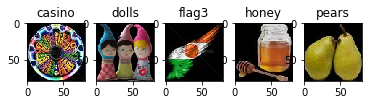

######################################################################
###################### SESSION N° 150226 #############################
######################################################################

Number of trial : 1242
Number of available trial (non missing data) : 636
Number of Succès : 587
monkey acc :  92.3  %


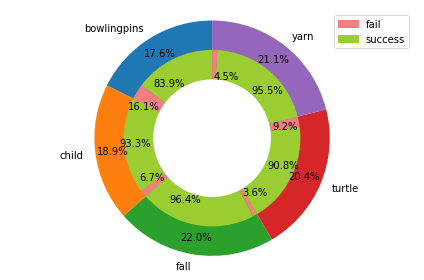

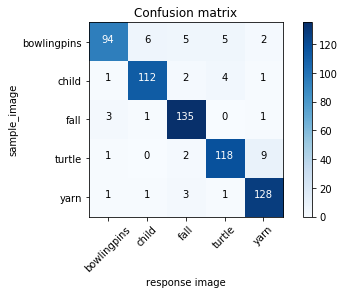

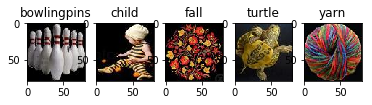

######################################################################
###################### SESSION N° 150227 #############################
######################################################################

Number of trial : 1176
Number of available trial (non missing data) : 644
Number of Succès : 602
monkey acc :  93.5  %


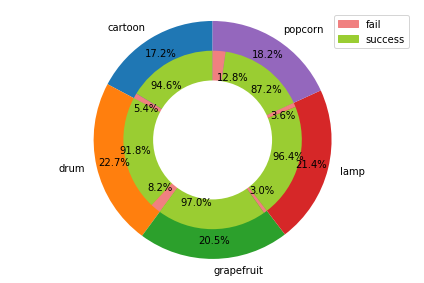

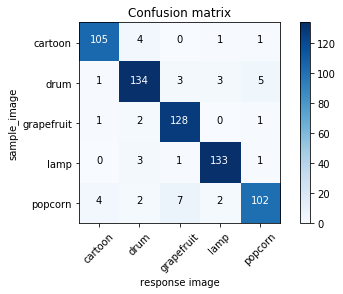

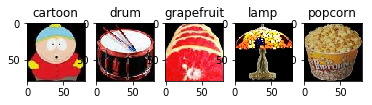

######################################################################
###################### SESSION N° 150302 #############################
######################################################################

Number of trial : 988
Number of available trial (non missing data) : 550
Number of Succès : 490
monkey acc :  89.1  %


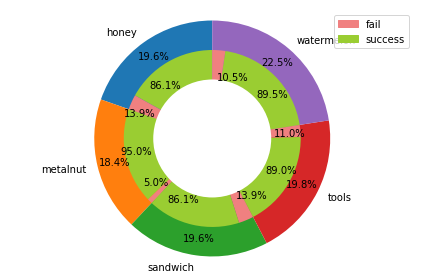

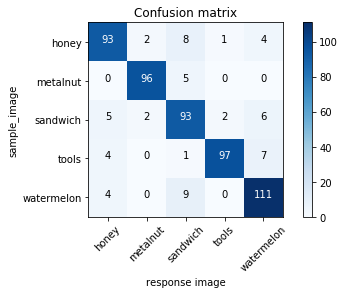

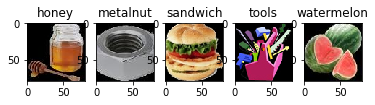

######################################################################
###################### SESSION N° 150303 #############################
######################################################################

Number of trial : 1241
Number of available trial (non missing data) : 674
Number of Succès : 621
monkey acc :  92.1  %


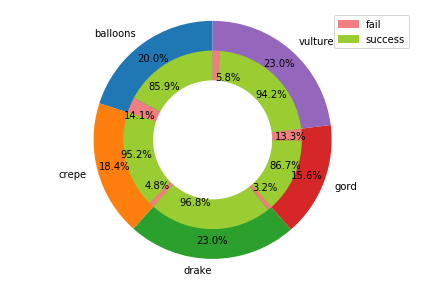

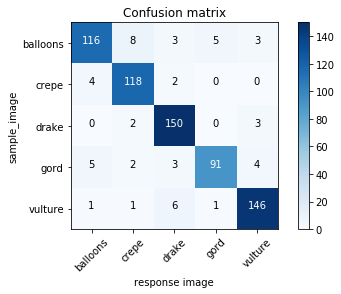

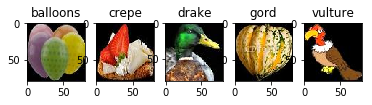

######################################################################
###################### SESSION N° 150304 #############################
######################################################################

Number of trial : 1271
Number of available trial (non missing data) : 689
Number of Succès : 637
monkey acc :  92.5  %


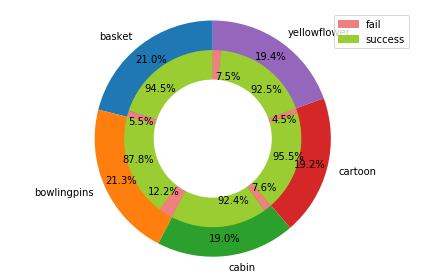

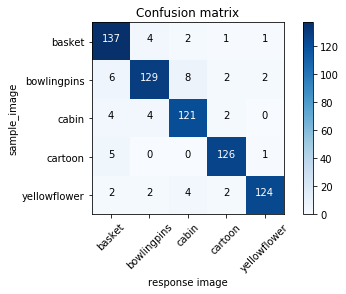

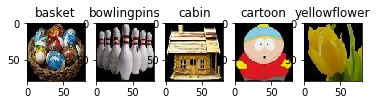

######################################################################
###################### SESSION N° 150305 #############################
######################################################################

Number of trial : 1325
Number of available trial (non missing data) : 842
Number of Succès : 755
monkey acc :  89.7  %


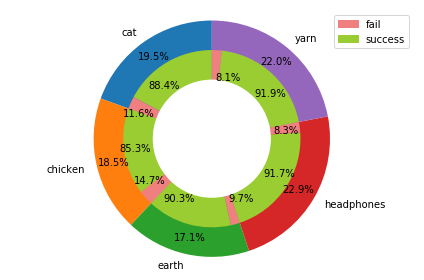

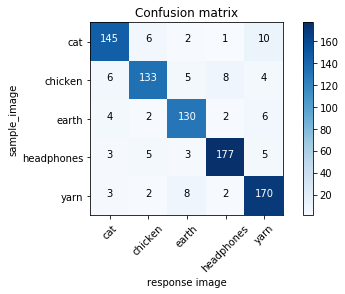

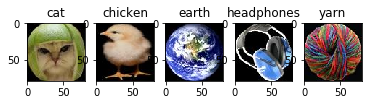

######################################################################
###################### SESSION N° 150403 #############################
######################################################################

Number of trial : 725
Number of available trial (non missing data) : 488
Number of Succès : 431
monkey acc :  88.3  %


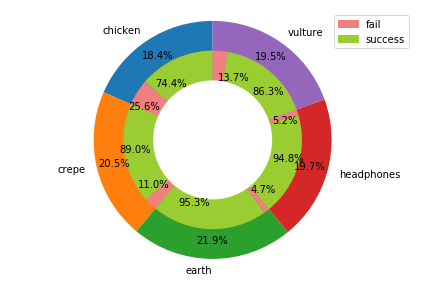

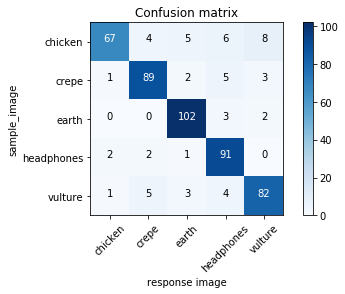

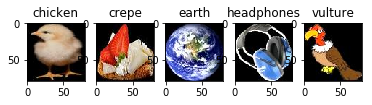

######################################################################
###################### SESSION N° 150407 #############################
######################################################################

Number of trial : 1365
Number of available trial (non missing data) : 720
Number of Succès : 623
monkey acc :  86.5  %


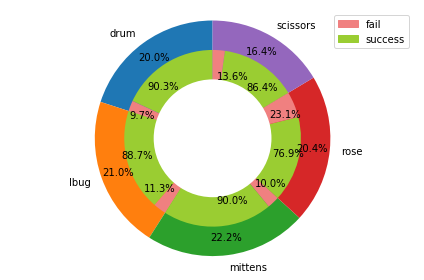

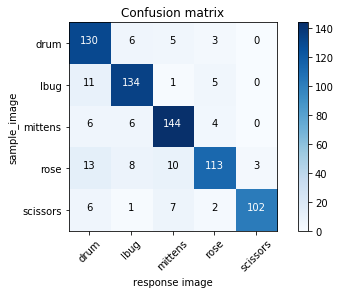

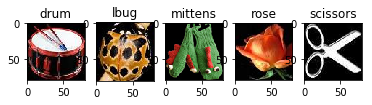

######################################################################
###################### SESSION N° 150408 #############################
######################################################################

Number of trial : 1136
Number of available trial (non missing data) : 573
Number of Succès : 499
monkey acc :  87.1  %


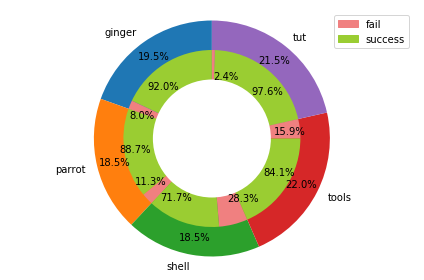

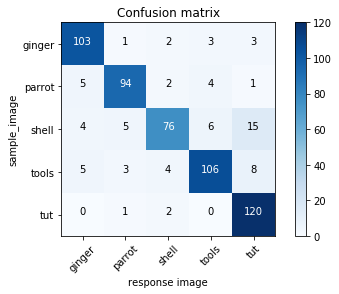

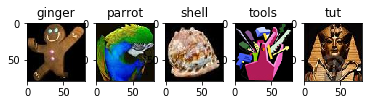

######################################################################
###################### SESSION N° 150413 #############################
######################################################################

Number of trial : 1038
Number of available trial (non missing data) : 617
Number of Succès : 512
monkey acc :  83.0  %


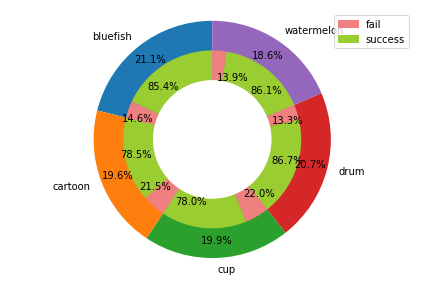

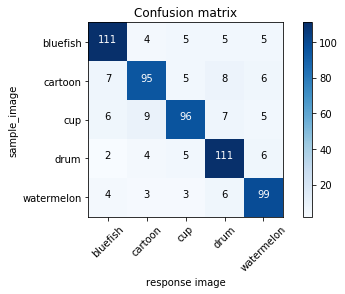

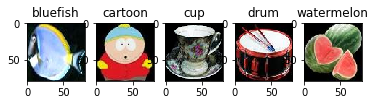

######################################################################
###################### SESSION N° 150414 #############################
######################################################################

Number of trial : 1052
Number of available trial (non missing data) : 606
Number of Succès : 553
monkey acc :  91.3  %


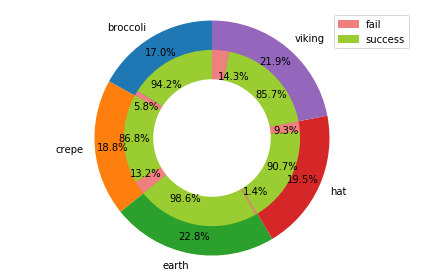

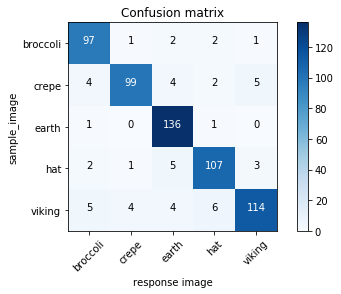

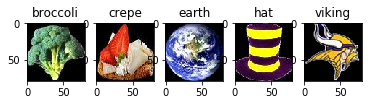

######################################################################
###################### SESSION N° 150415 #############################
######################################################################

Number of trial : 828
Number of available trial (non missing data) : 468
Number of Succès : 415
monkey acc :  88.7  %


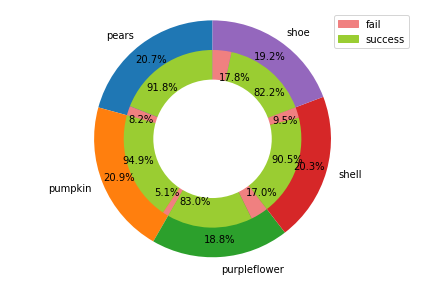

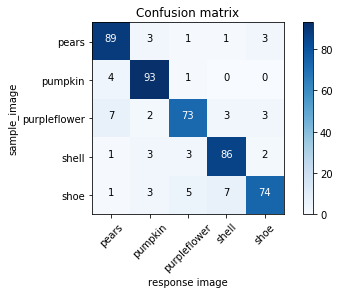

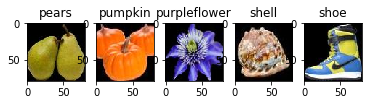

######################################################################
###################### SESSION N° 150416 #############################
######################################################################

Number of trial : 1098
Number of available trial (non missing data) : 633
Number of Succès : 572
monkey acc :  90.4  %


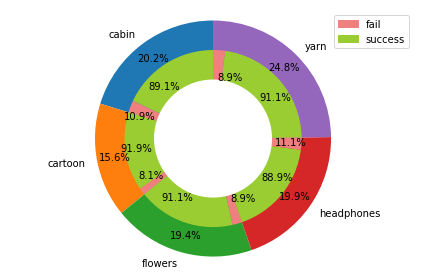

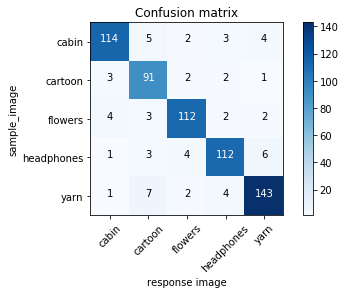

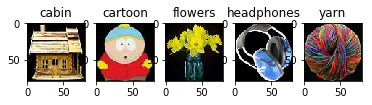

######################################################################
###################### SESSION N° 150427 #############################
######################################################################

Number of trial : 1028
Number of available trial (non missing data) : 594
Number of Succès : 534
monkey acc :  89.9  %


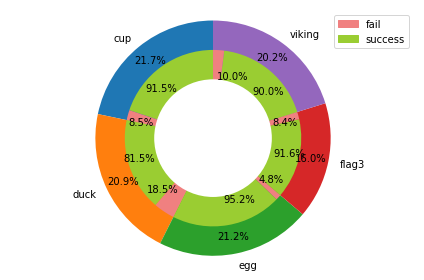

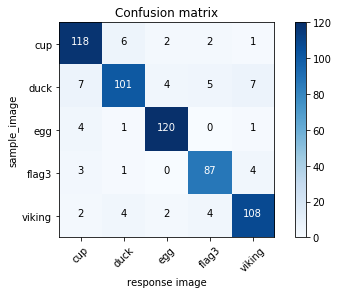

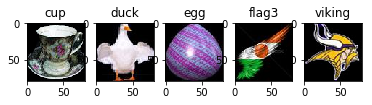

######################################################################
###################### SESSION N° 150428 #############################
######################################################################

Number of trial : 977
Number of available trial (non missing data) : 541
Number of Succès : 494
monkey acc :  91.3  %


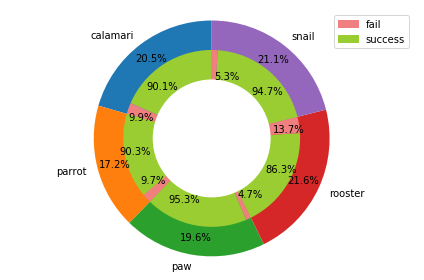

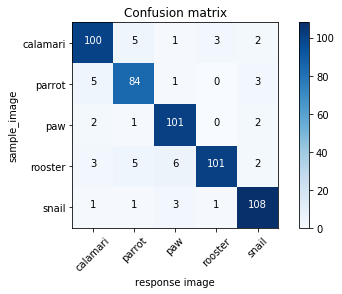

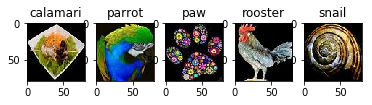

######################################################################
###################### SESSION N° 150429 #############################
######################################################################

Number of trial : 1031
Number of available trial (non missing data) : 630
Number of Succès : 579
monkey acc :  91.9  %


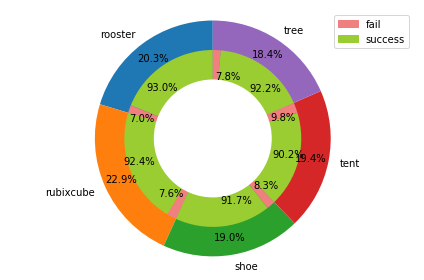

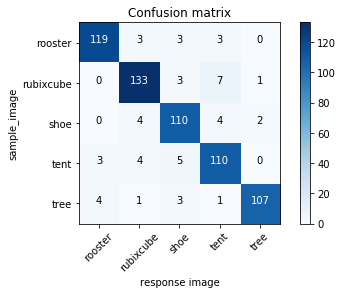

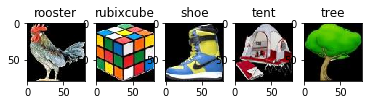

######################################################################
###################### SESSION N° 150430 #############################
######################################################################

Number of trial : 1113
Number of available trial (non missing data) : 633
Number of Succès : 567
monkey acc :  89.6  %


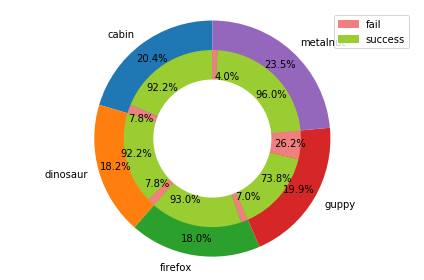

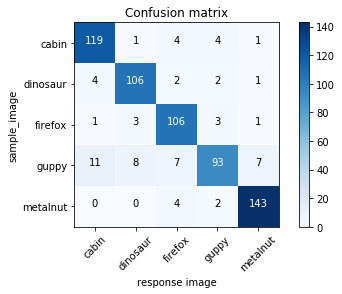

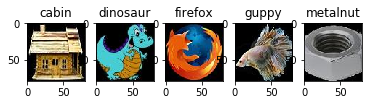

######################################################################
###################### SESSION N° 150504 #############################
######################################################################

Number of trial : 1129
Number of available trial (non missing data) : 592
Number of Succès : 506
monkey acc :  85.5  %


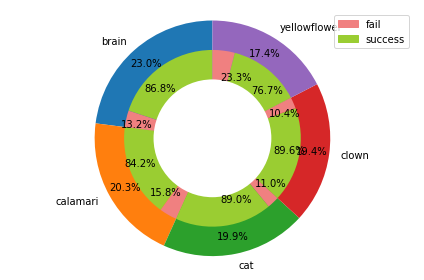

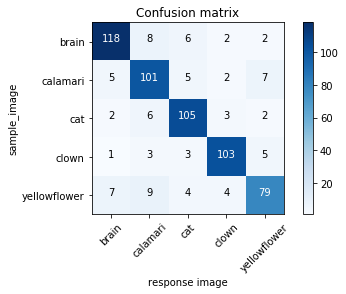

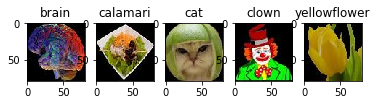

######################################################################
###################### SESSION N° 150511 #############################
######################################################################

Number of trial : 918
Number of available trial (non missing data) : 524
Number of Succès : 482
monkey acc :  92.0  %


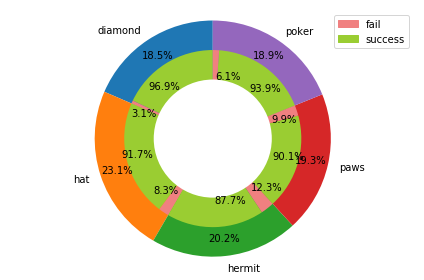

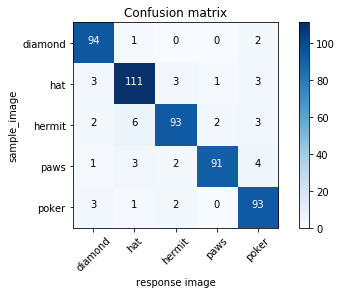

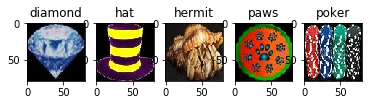

######################################################################
###################### SESSION N° 150512 #############################
######################################################################

Number of trial : 1097
Number of available trial (non missing data) : 669
Number of Succès : 562
monkey acc :  84.0  %


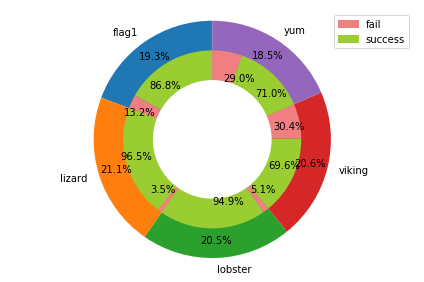

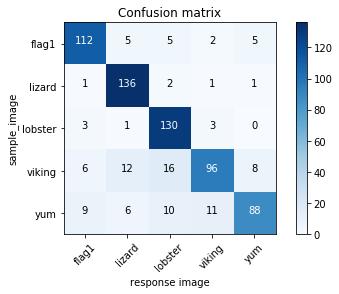

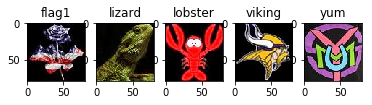

######################################################################
###################### SESSION N° 150527 #############################
######################################################################

Number of trial : 676
Number of available trial (non missing data) : 443
Number of Succès : 375
monkey acc :  84.7  %


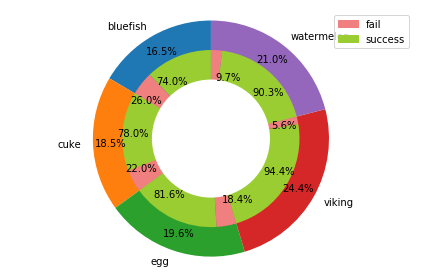

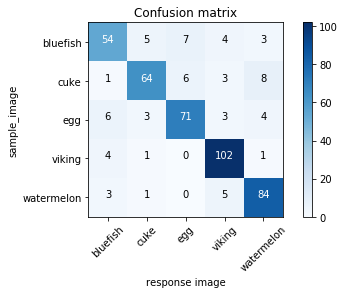

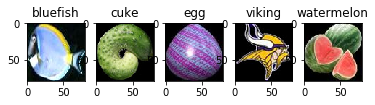

######################################################################
###################### SESSION N° 150528 #############################
######################################################################

Number of trial : 1103
Number of available trial (non missing data) : 675
Number of Succès : 586
monkey acc :  86.8  %


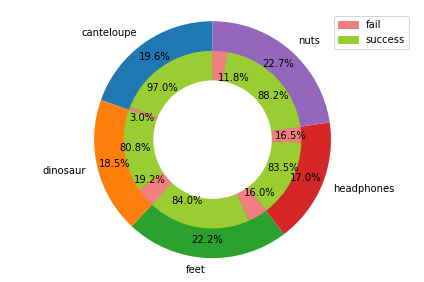

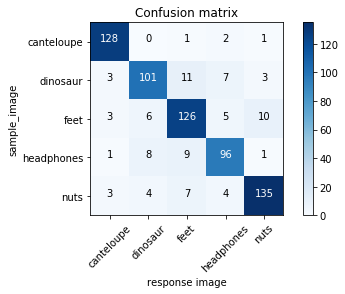

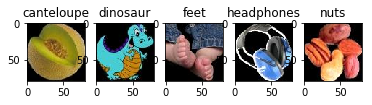

######################################################################
###################### SESSION N° 150529 #############################
######################################################################

Number of trial : 1068
Number of available trial (non missing data) : 628
Number of Succès : 547
monkey acc :  87.1  %


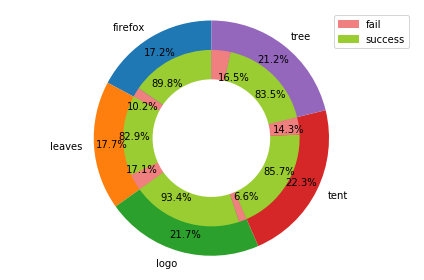

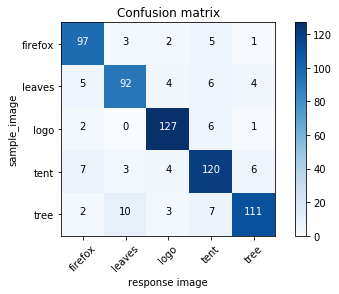

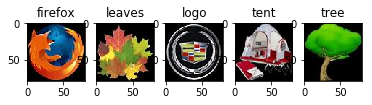

######################################################################
###################### SESSION N° 150608 #############################
######################################################################

Number of trial : 894
Number of available trial (non missing data) : 495
Number of Succès : 440
monkey acc :  88.9  %


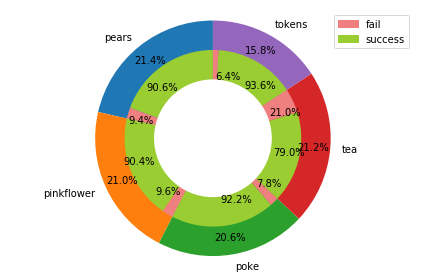

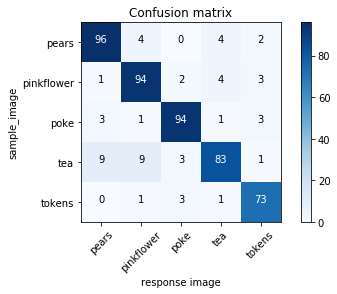

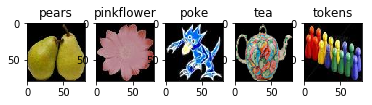

In [30]:
for sess_no in session :
    
    # path
    tinfo_path = raw_path + sess_no + '/session01/trial_info.mat' 
    rinfo_path = raw_path + sess_no + '/session01/recording_info.mat' 
    
    print('######################################################################')
    print('###################### SESSION N° '+ str(sess_no) + ' #############################')
    print('######################################################################\n')
    
    ################
    # 
    ################
    
    resp = io.get_responses(tinfo_path)


    ### Number of trial
    print('Number of trial :', len(resp))

    ### Number of available trial (non_missing data)
    print('Number of available trial (non missing data) :', np.sum(resp == resp) )

    ### Number of succès
    print('Number of Succès :', np.sum(resp == 1) )

    ### accuracy rate of the monkey
    print('monkey acc : ', round( 100*np.sum(resp == 1)/np.sum(resp==resp), 1 ), ' %')
    
    #################
    ### plot pie ####
    #################
    
    resp = io.get_responses(tinfo_path)
    stim = io.get_samples(tinfo_path)

    #keep only non missing data

    resp = resp[resp==resp].flatten()
    stim = stim[stim==stim].flatten()

    # get label = image name
    labels = io.get_image_names(rinfo_path)

    # c[i] = Number of element of the class i  i.e c[class] = N_i
    c = collections.Counter(stim)
    classes = len(c)

    # c2[i] = Number of succès of the class i 
    c2 = collections.Counter(stim[resp==1])
    succès_per_class = classes * [0]
    for i in range(classes):
        succès_per_class[i] = c2[i]/c[i]

    # N_per_class[classes] = Number of class i
    N_per_class = classes * [0]
    for i in range(classes):
        N_per_class[i] = c[i]


    # N_per_class_succes_fail[2*class] = Number of succès of class i
    # N_per_class_succes_fail[2*class+1] = Number of fail of class i
    N_per_class_succes_fail = []
    for i in range(5):
        N_per_class_succes_fail.append(c2[i])
        N_per_class_succes_fail.append(c[i]- c2[i])

    labels_gender = []
    for i in range(5):
        labels_gender.append(str(round(100*succès_per_class[i],1))+'%')
        labels_gender.append(str(round(100*(1-succès_per_class[i]),1))+'%')

    colors_gender = classes*['yellowgreen', 'lightcoral'] # [color of succès, color of fail]

    # Plot
    plt.pie(N_per_class, labels=labels, autopct='%1.1f%%', pctdistance=0.85,startangle=90,frame=True)
    plt.pie(N_per_class_succes_fail,labels=labels_gender ,labeldistance=0.7, colors=colors_gender,radius=0.75,startangle=90)
    #plt.pie(N_per_class_succes_fail,autopct='%1.1f%%', colors=colors_gender,radius=0.75,startangle=90)
    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.axis('equal')
    plt.tight_layout()
    red_patch = mpatches.Patch(color='lightcoral', label='fail')
    green_patch = mpatches.Patch(color='yellowgreen', label='success')
    plt.legend(handles=[red_patch, green_patch])
    #plt.legend(('red', 'b', 'g'), ('label1', 'label2', 'label3'))
    plt.show()
    
    ###########################################
    ### plot confusion matrix OF THE MONKEY ###
    ###########################################
    
    resp = io.get_responses(tinfo_path)
    stim = io.get_samples(tinfo_path)
    non_match = io.get_nonmatch(tinfo_path)

    labels = io.get_image_names(rinfo_path)

    # keep only non missing data

    resp = resp[resp==resp].flatten()
    stim = stim[stim==stim].flatten()
    non_match = non_match[non_match==non_match].flatten()

    # get confusion matrix
    y_true = stim
    y_pred = stim * resp + non_match * (1 - resp)
    cnf = confusion_matrix(y_true, y_pred)

    # plot it 
    #plt.figure(figsize=(5,5))
    plot_confusion_matrix(cnf, labels,
                              normalize=False,
                              title='Confusion matrix',
                              ylabel='sample_image',
                              xlabel='response image')
    
    plt.show()
    
    #####################
    ### plot stimulus ###
    #####################
    
    images = io.get_image(rinfo_path)
    images_names = io.get_image_names(rinfo_path)

    for i in range(0,5):
        plt.subplot(151+i)
        plt.imshow(images[i])
        plt.title(images_names[i])    

    plt.show()

    
    